# Chapter 10 - Introducing DL and TF

### Classification

In [21]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [3]:
# Loading fashion MNIST dataset
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()


In [4]:
# datasets insights
print(X_train_full.shape)
print(X_train_full.dtype)

(60000, 28, 28)
uint8


In [5]:
# creating validation set and scaling images
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [6]:
# index assigment to the class images
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
class_names[y_train[0]]

'Coat'

In [7]:
# Model using the Sequential API
model = keras.models.Sequential()
# flatten computes the same as using X.reshape(-1, 1)
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
# softmax for multi class classification
model.add(keras.layers.Dense(10, activation="softmax"))

2022-01-02 15:18:33.672943: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
# We can pass a list of layers
model = keras.models.Sequential([
# flatten computes the same as using X.reshape(-1, 1)
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In the dense layer are a lot of trainable parameters, but this can mean overfitting, especially if we don't have a lot of training data.

In [10]:
# Accesing parameters
weights, biases = model.layers[1].get_weights()
print(weights)
print(biases)

[[-0.04094823 -0.06484979 -0.06214181 ...  0.02847133 -0.03779142
  -0.07006058]
 [-0.01780953  0.03537125  0.02749476 ... -0.03493334  0.03907974
   0.05217421]
 [-0.01290033 -0.0607337   0.04049524 ... -0.01717551  0.03696581
  -0.06738206]
 ...
 [ 0.05619214  0.02518968  0.00406668 ... -0.04470732  0.00969991
  -0.02506723]
 [-0.00665344 -0.04226232  0.01060253 ... -0.05347344 -0.00094701
   0.06651762]
 [-0.06754795 -0.03428278 -0.0381333  ... -0.02397911 -0.01714364
   0.03286845]]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

If we ever want another weights or biases initialization, we can
set _kernel_initializer_ or _bias_initializer_ when creating a layer.

If there isn't the input_shape, Keras will figure it out when feeding the data or calling the _build()_ method. But the random initialization won't happen until then.

In [11]:
# Compiling the model and specifying the loss function and the optimizer
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])
# Is the same using:
# keras.metrics.sparse_categorical_accuracy and keras.optimizers.SGD()

We use __sparse_categorical_crossentropy__ loss because we have sparse labels (10 classes, we only predict one), we would use __categorical_crossentropy__ if we had one target probability per class for each instance (ex, one hot vectors, class1=[1, 0 ... 0]). If it were binary classification, in the last layer we would use the __sigmoid__ activation function and __binary_crossentropy__ as the loss.

To convert to 1-hot-vector from sparse, use: _keras.utils.to_categorical()_ . The other way around: _argmax(axis=1)_ 

Using _optimizer="sgd"_ defaults to lr=0.01. Better: _keras-optimizers.SGD(lr=???)_

Since this is a classifier, an useful measure is _accuracy_

In [12]:
# Training
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))
# Keras displays the metrics during the training

2022-01-02 15:18:38.091524: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-01-02 15:18:38.137957: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2901210000 Hz


Epoch 1/30
1719/1719 [==============================] - 6s 2ms/step - loss: 0.7127 - accuracy: 0.7648 - val_loss: 0.5502 - val_accuracy: 0.8094
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4891 - accuracy: 0.8319 - val_loss: 0.4497 - val_accuracy: 0.8460
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4444 - accuracy: 0.8446 - val_loss: 0.4365 - val_accuracy: 0.8532
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4160 - accuracy: 0.8540 - val_loss: 0.4153 - val_accuracy: 0.8544
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3965 - accuracy: 0.8613 - val_loss: 0.3848 - val_accuracy: 0.8638
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3801 - accuracy: 0.8655 - val_loss: 0.3746 - val_accuracy: 0.8702
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3654 - accuracy: 0.8716 - val_loss: 0.3727 - val_accuracy:

Instead of passing a validation_data argument, we can set _validation_split_ =0.2 (for example), to get a 20% validation split from the training.

If the training set was very skewed, with some classes being overrepresented and other underrepresented, setting _class_weight_ argument in the __fit()__ method, would give larger weight to the underrepresented classes and viceversa, this weights are used when computing the loss. If we need per-instance weights (some data is better than other), _sample_weight_ argument can help us, if both of these are used, Keras multiply them.

Text(0.5, 0, 'epoch')

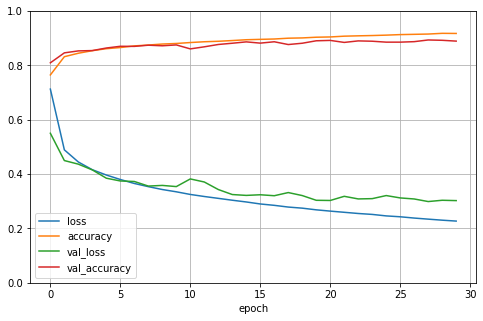

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
# plotting the measurments in the history object
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.xlabel("epoch")

The validation error is computed at the end of each epoch, while the training error is computed using a running mean during each epoch. So the training curve should be shifted by half an epoch to the left.

In [18]:
# Using the evaluate() method
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 57.4205 - accuracy: 0.8533


[57.42045593261719, 0.8532999753952026]

In [20]:
# Making predictions
X_pred3 = X_test[:3]
y_proba = model.predict(X_pred3)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [22]:
y_pred = model.predict_classes(X_pred3)
print(y_pred)
np.array(class_names)[y_pred]

[9 2 1]


/usr/local/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [24]:
np.array(class_names)[np.argmax(y_proba, axis=1)]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

### Regression

In [26]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [29]:
housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [39]:
# The output layer has a single neuron with no activation function, the loss is mse.
model = keras.models.Sequential([
    # the data is noisy, to avoid overfitting we only use one neuron
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

In [40]:
model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 0.8075 - val_loss: 0.5327
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6633 - val_loss: 0.4751
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5335 - val_loss: 0.4278
Epoch 4/20
363/363 [==============================] - 0s 986us/step - loss: 0.4499 - val_loss: 0.4008
Epoch 5/20
363/363 [==============================] - 0s 990us/step - loss: 0.4361 - val_loss: 0.3937
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4291 - val_loss: 0.3815
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4135 - val_loss: 0.3792
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4112 - val_loss: 0.3696
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6253 - val_loss: 0.3918
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4319 - val_loss: 0.

In [33]:
X_predr = X_test[:3]
y_pred = model.predict(X_predr)
y_pred

array([[2.3966956],
       [3.3373933],
       [2.1594954]], dtype=float32)

### Complex models using the functional API

One example of a nonsequential neural network is the following:
<center><img src="img/non_sequential.png"></img></center>
It is used for learning the deep patterns as well as the simple rules, through the short path.

In [37]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(15, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)

model = keras.Model(inputs=[input_], outputs=[output])

In [38]:
model.compile(loss="mean_squared_error", optimizer="sgd")
model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
nonsequential = model.evaluate(X_test, y_test)

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 1425.9247 - val_loss: 26.4639
Epoch 2/20
363/363 [==============================] - 0s 998us/step - loss: 271.1783 - val_loss: 728.6556
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 5944.3735 - val_loss: 21022.8184
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 292344.9688 - val_loss: 644968.9375
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 9082048.0000 - val_loss: 18387888.0000
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 246448928.0000 - val_loss: 549481920.0000
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 8305761792.0000 - val_loss: 15059102720.0000
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 147085656064.0000 - val_loss: 436059865088.0000
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 4437341896704.0000 - val_loss

Send a subset of features through the wide path and a different subset through the deep path.
<center><img src="img/non_sequential2.png"></img></center>

In [43]:
# at least name he most important layers
inputA = keras.layers.Input(shape=[5], name="wide_input")
inputB = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(inputB)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([inputA, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.Model(inputs=[inputA, inputB], outputs=[output])

In [44]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20, 
                    validation_data=((X_valid_A, X_valid_B), y_valid))

/usr/local/lib/python3.8/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 1.8139 - val_loss: 0.7748
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.7349 - val_loss: 0.6336
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6428 - val_loss: 0.5824
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6032 - val_loss: 0.5507
Epoch 5/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5771 - val_loss: 0.5290
Epoch 6/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5572 - val_loss: 0.5113
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5401 - val_loss: 0.4965
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5288 - val_loss: 0.4847
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5166 - val_loss: 0.4794
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5088 - val_loss: 0.4676

In [46]:
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))
y_pred

162/162 [==============================] - 0s 895us/step - loss: 0.4504


array([[2.4145455],
       [2.5913994],
       [2.5508673]], dtype=float32)

### Multiple outputs
Examples:
- Locate and classify objects
- Independent tasks, a single ANN is better because it can learn useful features across tasks
- Like a regularization technique 
<center><img src="img/non_sequential3.png"></img></center>

In [47]:
inputA = keras.layers.Input(shape=[5], name="wide_input")
inputB = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(inputB)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([inputA, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.Model(inputs=[inputA, inputB], outputs=[output, aux_output])

In [49]:
# List of losses, if we only pass one, the same is used for both outputs.
# We care much more for the main output loss, so lets declare its weight to 90%
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer="sgd")

In [50]:
# We need to provide labels for each output:
history = model.fit(
    [X_train_A, X_train_B], [y_train, y_train], epochs=20,
    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid])
)

Epoch 1/20
363/363 [==============================] - 2s 2ms/step - loss: 1.2195 - main_output_loss: 1.1674 - aux_output_loss: 1.6886 - val_loss: 0.7318 - val_main_output_loss: 0.6800 - val_aux_output_loss: 1.1981
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6830 - main_output_loss: 0.6362 - aux_output_loss: 1.1037 - val_loss: 0.5406 - val_main_output_loss: 0.4900 - val_aux_output_loss: 0.9957
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5940 - main_output_loss: 0.5511 - aux_output_loss: 0.9801 - val_loss: 0.4915 - val_main_output_loss: 0.4415 - val_aux_output_loss: 0.9412
Epoch 4/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5113 - main_output_loss: 0.4710 - aux_output_loss: 0.8744 - val_loss: 0.4621 - val_main_output_loss: 0.4270 - val_aux_output_loss: 0.7776
Epoch 5/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4808 - main_output_loss: 0.4506 - aux_output_loss: 0.7528 - val_loss

In [51]:
total_loss, main_loss, aux_loss = model.evaluate(
    [X_test_A, X_test_B], [y_test, y_test]
)

162/162 [==============================] - 0s 1ms/step - loss: 0.3702 - main_output_loss: 0.3599 - aux_output_loss: 0.4630


In [53]:
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])
print(y_pred_main, y_pred_aux)

[[2.3520784]
 [3.307941 ]
 [2.219055 ]] [[2.161956 ]
 [3.3371372]
 [2.0777373]]


In [ ]:
# Save and load a model
model.save("my_model.h5")
load_model = model.load("my_model.h5")

### Callbacks

In [ ]:
# Callbacks: save the model when something happen
checkpoint = keras.callbacks.ModelCheckpoint("my_model2.h5")
history2 = model.fit(X_train, y_train, epochs=10, callbacks=[checkpoint])
# using save_best_only=True, saves the best perfomance in the validation set
checkpoint2 = keras.callbacks.ModelCheckpoint("my_model3.h5", save_best_only=True)
history2 = model.fit(X_train, y_train, epochs=10,
                     validation_data=(X_valid, y_valid),
                     callbacks=[checkpoint2])
# rolling back to the best model
best_model = keras.models.load_model("my_model3.h5")

In [ ]:
# Early stopping: stop when no progress is made in a number of epochs
early_stopping = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
history2 = model.fit(X_train, y_train, epochs=100,
                     validation_data=(X_valid, y_valid),
                     callbacks=[checkpoint2, early_stopping])

In [ ]:
#Custom callback, print something after epoch
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))
# There are a lot of implementations for a callback, page 316

### Using the Subclassing API to build dynamic models

The __Sequential API__ and the __Functional API__ are really useful, the model can be saved, clone, shared, it can be analized, the framework can infere shapes and check type... but it is static. The __Subclassing API__ allows us to make models with loops, conditionals, varying shapes, etc, but it doesn't have the benefits of the first two APIs. We can save and restore manually some parameters with _save_weights()_ and _load_weights()_


In [63]:
class WideAndDeepModel(keras.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs) # handles standard args, e.g. name
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)

    def call(self, inputs):
        # this method is versatile
        inputA, inputB = inputs
        hidden1 = self.hidden1(inputB)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([inputA, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model = WideAndDeepModel()

In [64]:
model.compile(loss="mean_squared_error", loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit((X_train_A, X_train_B),(y_train, y_train),
             epochs=20, validation_data=((X_valid_A, X_valid_B), (y_valid, y_valid)))
total_loss, main_loss, aux_loss = model.evaluate((X_test_A, X_test_B), (y_test, y_test))
y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 2.4381 - output_1_loss: 2.2326 - output_2_loss: 4.2876 - val_loss: 1.1334 - val_output_1_loss: 0.8985 - val_output_2_loss: 3.2469
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 1.0177 - output_1_loss: 0.8270 - output_2_loss: 2.7339 - val_loss: 0.8445 - val_output_1_loss: 0.6938 - val_output_2_loss: 2.2005
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.8293 - output_1_loss: 0.6949 - output_2_loss: 2.0382 - val_loss: 0.7408 - val_output_1_loss: 0.6254 - val_output_2_loss: 1.7793
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.7547 - output_1_loss: 0.6428 - output_2_loss: 1.7620 - val_loss: 0.6867 - val_output_1_loss: 0.5834 - val_output_2_loss: 1.6161
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.7111 - output_1_loss: 0.6075 - output_2_loss: 1.6427 - val_loss: 0.6538 - val_output_1_loss: 0.5555 - val_ou

### Fine tuning Neural network hyperparameters

In [ ]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    # Simple sequential model for univariate regression
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers(keras.optimizers.SGD(lr=learning_rate))
    model.compile(loss="mse", optimizer=optimizer)
    return model

In [ ]:
# GridSearchCV or RandomizedSearchCV from scikit-learn into Keras
# it is like a regular Scikit-Learn regressor: fit(), score(), predict()
keras_regressor = keras.wrappers.scikit_learn.KerasRegressor(build_model)
# Any extra parameter will be passed to the underlying Keras model
keras_regressor.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[keras.callbacks.EarlyStopping(patience=10)])
mse_test = keras_regressor.score(X_test, y_test)
y_pred = keras_regressor.predict(X_pred3)

In [ ]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distributions = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100),
    "learning_rate": reciprocal(3e-4, 3e-2)
}
# RandomizedSearchCV uses K-fold cross-validation, it doesn't use the validation
# data, this is only used for early stopping
rnd_search_cv = RandomizedSearchCV(keras_regressor, param_distributions, n_iter=10, cv=3)
rnd_search_cv.fit(X_train, y_train, epochs=100,
                  validation_data=(X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

In [ ]:
# Accesing the best parameters
print(rnd_search_cv.best_params_)
print(rnd_search_cv.best_score_)
# saving
model = rnd_search_cv.best_estimator_.model

### Some tips on tuning

Using the same number of neurons in all hidden layer perform just as well as a piramid (more neurons at the start).

It is practical to use a model with more layers and neurons than needed, just use early stopping and other regularization techniques.

__learning rate:__ Ideal would be to increase it per epoch by some little magnitude and when the loss explodes, pick a lr before it happened.

__batch size:__ Small (2-32) is almost good anytime. If we have a GPU it can be larger (up to 8192 for e.g.), and using learning rate warm up, it lead to small training time.

__update always the learning rate if other parameter is changed__